# 0. Introduction
In this notebook, we are going to perform data analysis and build machine learning model from customer churn data. The goal of this project is to build a model which can predict whether or not a customer will stop using the services of the business which can lead to significant losses


###  Customer Churn

- Customer churn is a term used when a customer decides to stop using the services of the business or ends the relationship with a company

- Predicting customer churn is critical for a company to be able to effectively retain customers. It is more costly to acquire new customers than to retain existing ones. 

- The goal of this project is to predict which customers are more likely to change and take actions accordingly

## Dataset
The dataset information is avaliable on [kaggle](https://www.kaggle.com/c/customer-churn-prediction-2020/overview)

### Data Overview
The training dataset contains 4250 samples and 19 features (independent variables) and the Churn column indicates the class of the sample

Features:
1. state : 2-letter code of the US state of customer residence
2. account_length: Number of months the customer has been with the current telco provider
3. area_code: area_code_AAA" where AAA = 3 digit area code.
4. international_plan: The customer has international plan.
5. voice_mail_plan: The customer has voice mail plan.
6. number_vmail_messages: Number of voice-mail messages.
7. total_day_minutes: Total minutes of day calls.
8. total_day_calls: Total minutes of day calls.
9. total_day_charge: otal charge of day calls.
10. total_eve_minutes: Total minutes of evening calls.
11. total_eve_calls: Total number of evening calls.
12. total_eve_charge: Total charge of evening calls.
13. total_night_minutes: Total minutes of night calls.
14. total_night_calls: Total number of night calls.
15. total_night_charge: Total charge of night calls.
16. total_intl_minutes: Total minutes of international calls.
17. total_intl_calls: Total number of international calls.
18. total_intl_charge: Total charge of international calls
19. number_customer_service_calls": Number of calls to customer service
20. churn : Customer churn - target variable.

## 1. Import Libraries
Libraries are essentially extensions to Python that consist of functions that are handy to have when we are performing our analysis.

In [1]:
# Data wrangling
import pandas as pd
import numpy as np

# Data visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# Machine learning models
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

# Model evaluation
from sklearn.metrics import recall_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Remove warnings
import warnings
warnings.filterwarnings('ignore')

### 2. Import and read data


In [2]:
# Training data
train = pd.read_csv('train.csv')


Let's have a look at the datasets

In [3]:
# First five rows of training data
train.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


## 3. Exploratory Data Analysis

### 3.1 Unique values for each feature, data types, and summary statistics

In [4]:
# Investigate all the elements whithin each Feature 

for col in train:
    unique_values = np.unique(train[col])
    nr_values = len(unique_values)
    if nr_values <= 10:
        print("The number of values for feature {} is: {} -- {}".format(col, nr_values, unique_values))
    else:
        print("The number of values for feature {} is: {}".format(col, nr_values))

The number of values for feature state is: 51
The number of values for feature account_length is: 215
The number of values for feature area_code is: 3 -- ['area_code_408' 'area_code_415' 'area_code_510']
The number of values for feature international_plan is: 2 -- ['no' 'yes']
The number of values for feature voice_mail_plan is: 2 -- ['no' 'yes']
The number of values for feature number_vmail_messages is: 46
The number of values for feature total_day_minutes is: 1843
The number of values for feature total_day_calls is: 120
The number of values for feature total_day_charge is: 1843
The number of values for feature total_eve_minutes is: 1773
The number of values for feature total_eve_calls is: 123
The number of values for feature total_eve_charge is: 1572
The number of values for feature total_night_minutes is: 1757
The number of values for feature total_night_calls is: 128
The number of values for feature total_night_charge is: 992
The number of values for feature total_intl_minutes is: 

In [5]:
# Non-null count and data types of the training and test set
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [6]:
# Missing data in training set by columns
train.isnull().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

In [7]:
# Summary statistics for training set 

train.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


### 3.2 Feature Analysis

### 3.2.1 Categorical variables
Categorical variables in our dataset are churn, state, area code, international plan, voice mail plan

### Categorical variable: Churn

no     0.859294
yes    0.140706
Name: churn, dtype: float64


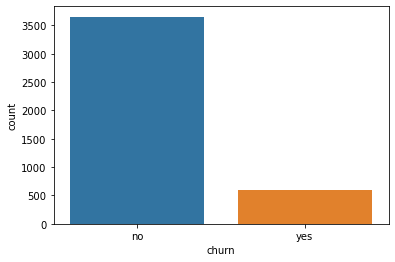

In [8]:
print(train['churn'].value_counts(normalize=True))

# Visualize the churn and non-churners distribution
sns.countplot(x = train['churn'])
plt.show()

In this dataset we have imbalanced class distribution with 86% of the data distribution data are classified as non-churners and we have only 14% data are churners. Since we have imbalanced data accuracy is not a good metrics for this case because we would have a high accuracy for non-churners

Comparing the different between churners and non-churnes by the average of numerical features

In [9]:
train.groupby('churn').mean()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
churn,,,,,,,,,,,,,,,
no,99.924973,8.177437,175.555093,99.813801,29.844948,198.570674,100.231380,16.878743,199.577519,99.942771,8.981131,10.194441,4.460570,2.753018,1.441676
yes,102.137124,4.299331,208.990134,100.478261,35.528679,209.964883,99.841137,17.847207,206.331773,99.209030,9.285033,10.632441,4.217391,2.871254,2.275920


#### Observation:
- Churners have a more account length than non-churners
- Churners made more customer service calls than non-churners
- Churners made more total_day_minutese calls than non-churners
- Churners made more total_day_calls calls than non-churners
- Churners made more total_day_charge than non-churners
- Churners made more total_eve_minutes than non-churners
- Churners made more total_night_minutes than non-churners
- Churners made more total_night_charge than non-churners
- Churners made more total_intl_minutes than non-churners
- Churners made more total_eve_charge than non-churners
- Churners made more total_intl_minutes than non-churners
- Churners made more total_intl_charge than non-churners


Let's see the difference for churners and non-churners for made a call for customer service and we will compare the customer service call by categorical feature; area code, vmail_plan, and international plan

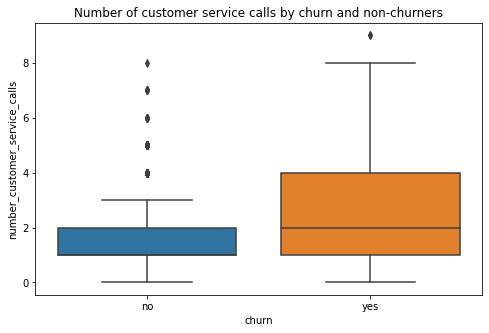

In [10]:
# Visualize the difference between churn and non churners for customer service calls
plt.figure(figsize=(8,5))
sns.boxplot(x='churn', y='number_customer_service_calls', data =train)
plt.title('Number of customer service calls by churn and non-churners')
plt.show()

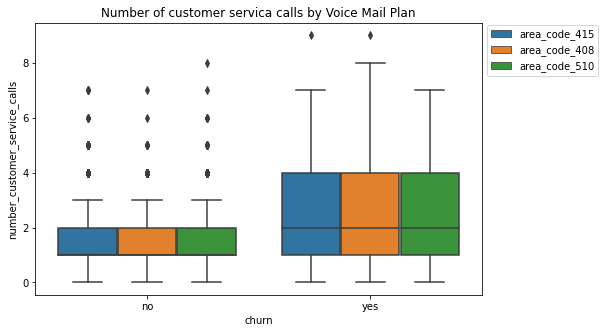

In [11]:
# Visualize the difference between churn and non churners for customer service calls by area code
plt.figure(figsize=(8,5))
sns.boxplot(x='churn', y='number_customer_service_calls', data =train, hue='area_code')
plt.title('Number of customer servica calls by Voice Mail Plan')
plt.legend(bbox_to_anchor=(1,1.01))
plt.show()

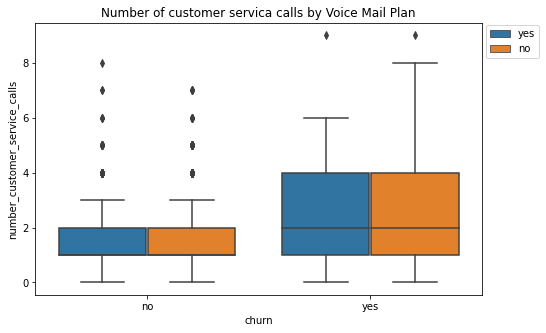

In [12]:
# Visualize the difference between churn and non churners for customer service calls by voice mail plan
plt.figure(figsize=(8,5))
sns.boxplot(x='churn', y='number_customer_service_calls', data =train, hue='voice_mail_plan')
plt.title('Number of customer servica calls by Voice Mail Plan')
plt.legend(bbox_to_anchor=(1.14,1.01))
plt.show()

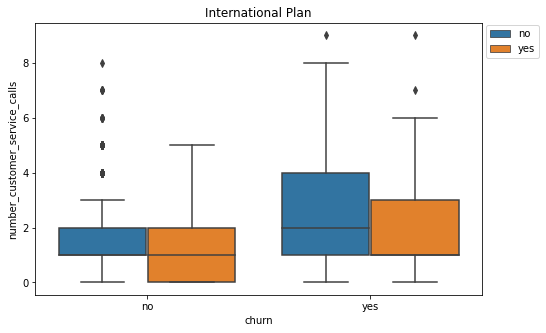

In [13]:
# Visualize the difference between churn and non churners for customer service calls by international plan
plt.figure(figsize=(8,5))
sns.boxplot(x='churn', y='number_customer_service_calls', data =train, hue='international_plan')
plt.title('International Plan')
plt.legend(bbox_to_anchor=(1.14,1.01))
plt.show()

### Categorical variable: State

In [14]:
train['state'].value_counts()

WV    139
MN    108
ID    106
AL    101
VA    100
OR     99
TX     98
UT     97
NY     96
NJ     96
WY     95
OH     95
WI     94
MA     89
ME     89
CT     88
RI     87
MI     87
KS     87
MD     86
VT     86
KY     85
NV     83
IN     83
MS     82
WA     80
NC     80
MO     80
DE     80
CO     80
MT     80
IL     79
TN     79
NM     78
OK     78
NH     78
HI     77
AZ     77
FL     76
SD     75
NE     73
DC     72
SC     72
AR     71
LA     69
PA     67
ND     67
GA     64
IA     62
AK     61
CA     39
Name: state, dtype: int64

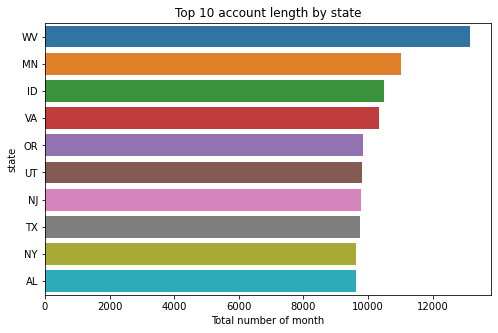

In [15]:
total_ac_per_state = train.groupby('state')['account_length'].sum().reset_index(name='total_month')
top_10_total_ac_per_state = total_ac_per_state.sort_values(by='total_month', ascending=False).head(10)

# Visualize the top 10 states for churners
plt.figure(figsize=(8,5))
sns.barplot(x='total_month', y='state', data=top_10_total_ac_per_state)
plt.title('Top 10 account length by state')
plt.xlabel('Total number of month')
plt.show()

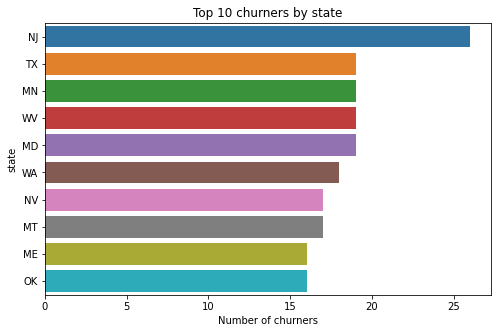

In [16]:
# Grouping data only for churners
churners = train[train['churn'] == 'yes']
churners_by_state = churners.groupby('state')['churn'].value_counts().reset_index(name='count')
top_10_churners_by_state = churners_by_state.sort_values(by='count', ascending=False).head(10)

# Visualize the top 10 states for churners
plt.figure(figsize=(8,5))
sns.barplot(x='count', y='state', data=top_10_churners_by_state)
plt.title('Top 10 churners by state')
plt.xlabel('Number of churners')
plt.show()

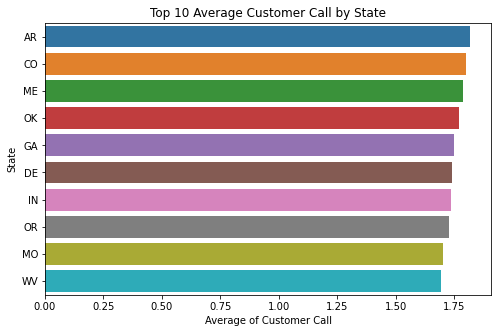

In [17]:
avg_cust_call_by_state = train.groupby('state')['number_customer_service_calls'].mean().reset_index(name='average_cust_call')
top_10_avg_cust_call_by_state = avg_cust_call_by_state .sort_values(by='average_cust_call', ascending=False).head(10)

# Visualize the top 10 states for churners
plt.figure(figsize=(8,5))
sns.barplot(x='average_cust_call', y='state', data=top_10_avg_cust_call_by_state)
plt.title('Top 10 Average Customer Call by State')
plt.ylabel('State')
plt.xlabel('Average of Customer Call')
plt.show()

### Categorical variable: area code

In [18]:
train['area_code'].value_counts()

area_code_415    2108
area_code_408    1086
area_code_510    1056
Name: area_code, dtype: int64

In [19]:
train.groupby('area_code').mean()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
area_code,,,,,,,,,,,,,,,
area_code_408,101.550645,7.551565,178.401381,99.162983,30.328766,201.233794,100.697974,17.105018,198.291621,99.145488,8.923232,10.109945,4.388582,2.730341,1.571823
area_code_415,100.218691,7.761860,181.683871,100.931689,30.886850,199.099383,100.038899,16.923672,201.460484,99.897059,9.065897,10.352751,4.490038,2.795745,1.525142
area_code_510,98.919508,7.454545,179.327462,98.627841,30.486155,201.228883,99.914773,17.104782,200.966004,100.438447,9.043561,10.213352,4.338068,2.758002,1.613636


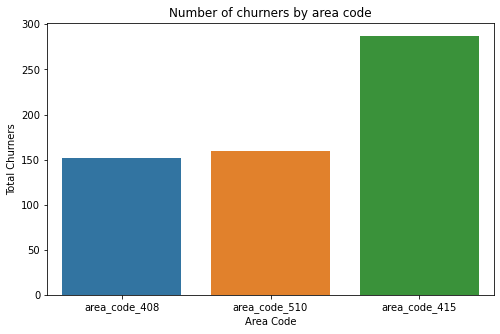

In [20]:
churners = train[train['churn'] == 'yes']
churners_by_area_code = churners.groupby('area_code')['churn'].value_counts().reset_index(name='number_of_churn')
churners_by_area_code = churners_by_area_code.sort_values(by='number_of_churn')

# Visualize the top 10 states for churners
plt.figure(figsize=(8,5))
sns.barplot(x='area_code', y='number_of_churn', data=churners_by_area_code)
plt.title('Number of churners by area code')
plt.ylabel('Total Churners')
plt.xlabel('Area Code')
plt.show()

We can see that area code of number 415 has the highest churn customers

### Categorical variable: International Plan

In [21]:
# Number of customers that have a international plan
train['international_plan'].value_counts()

no     3854
yes     396
Name: international_plan, dtype: int64

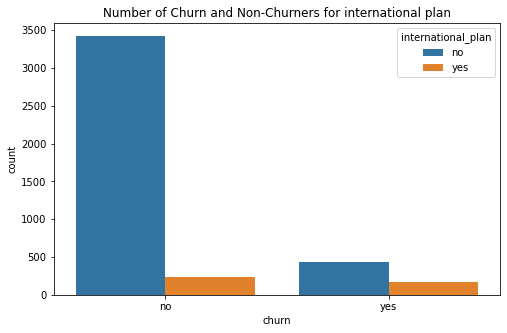

In [22]:
# Number of churners and non-churners that have a international plan
plt.figure(figsize=(8,5))
sns.countplot(x = 'churn', hue='international_plan', data=train)
plt.title('Number of Churn and Non-Churners for international plan')
plt.show()

Majority for our customers did not have a international plan, only a few people of our customers that has a international plan for both churn and non-churners

### 3.2.2 Numerical features

Let's take a look at the distribution for the number of months the customer has been with the service from the company

The average of account length:  100.24


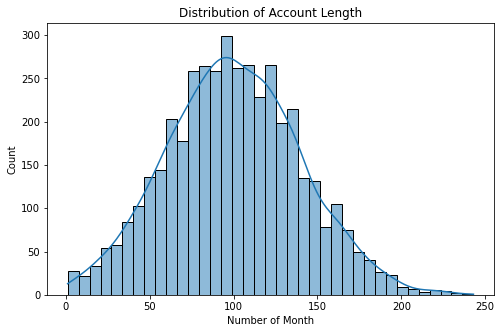

In [23]:
print('The average of account length: ', np.round(train['account_length'].mean(axis=0), 2))

# Visualize the account_length distribution
plt.figure(figsize=(8,5))
sns.histplot(data= train['account_length'], kde=True)
plt.title('Distribution of Account Length')
plt.xlabel('Number of Month')
plt.show()

The distribution of account length is approximately normally distributed with average 100.24

Let's take a look for the distribution of total calls, total charge and total minutes and we will explore and visualising that features for a day, evening, night, and international

In [24]:
# Build a function for visualize distribution
def plotting_features_distribution(features):
    plt.figure(figsize=(15,12))
    plt.subplots_adjust(hspace=0.5)   

    for n, feature in enumerate(features):
        # add a new subplot iteratively
        ax = plt.subplot(2, 2, n + 1)

        # filter df and plot ticker on the new subplot axis
        sns.histplot(train[feature], kde=True)

        # chart formatting
        ax.set_title(feature.title())
        ax.set_xlabel("")

In [25]:
# Create a different variable for day, evening, night, and international
day_features = ['total_day_minutes','total_day_calls','total_day_charge']
evening_features = ['total_eve_minutes','total_eve_calls','total_eve_charge']
night_features = ['total_night_minutes','total_night_calls','total_night_charge']
international_features = ['total_intl_minutes','total_intl_calls','total_intl_charge']

Features: Day

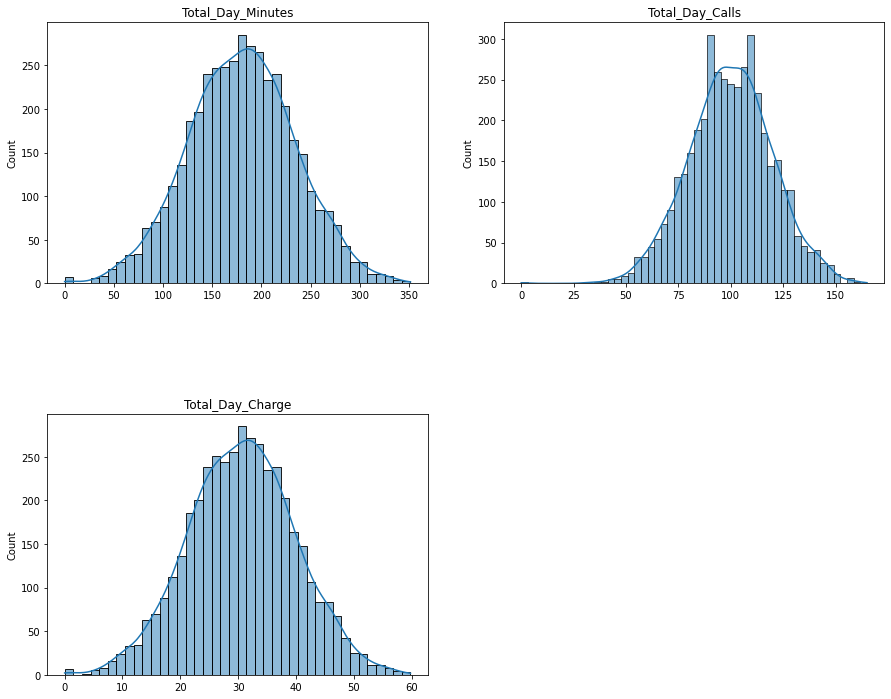

In [26]:
# Visualize the day features distribution
plotting_features_distribution(day_features) 

Fatures: Evening

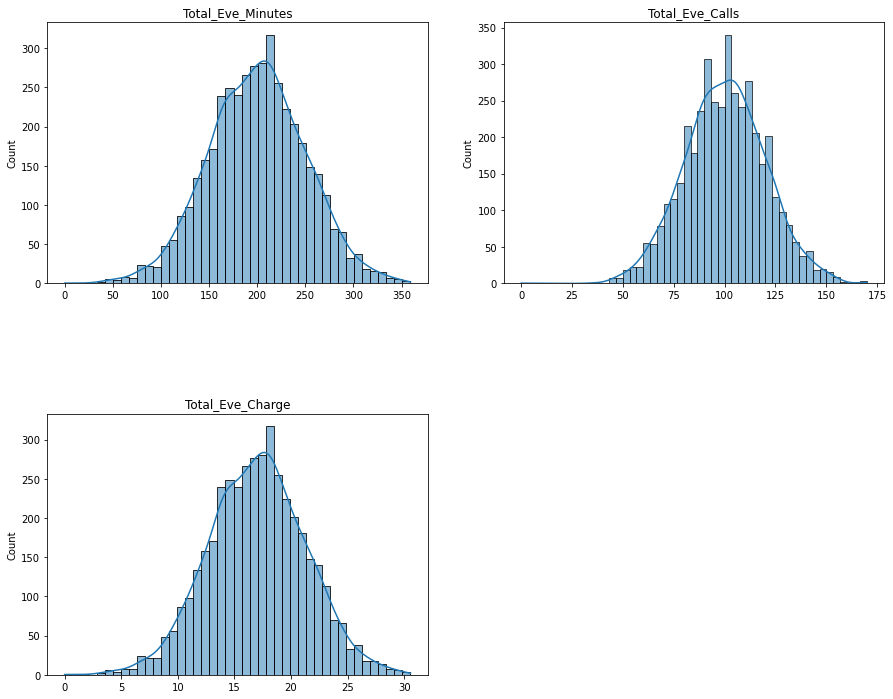

In [27]:
# Visualize the evening features distribution
plotting_features_distribution(evening_features)

Features: Night

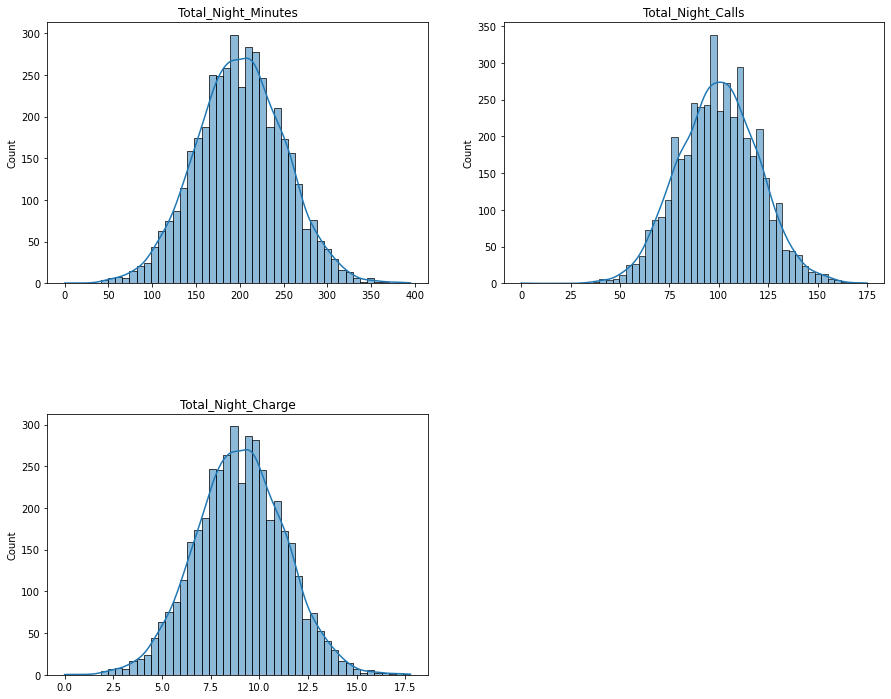

In [28]:
# Visualize the night features distribution
plotting_features_distribution(night_features)

Features: International

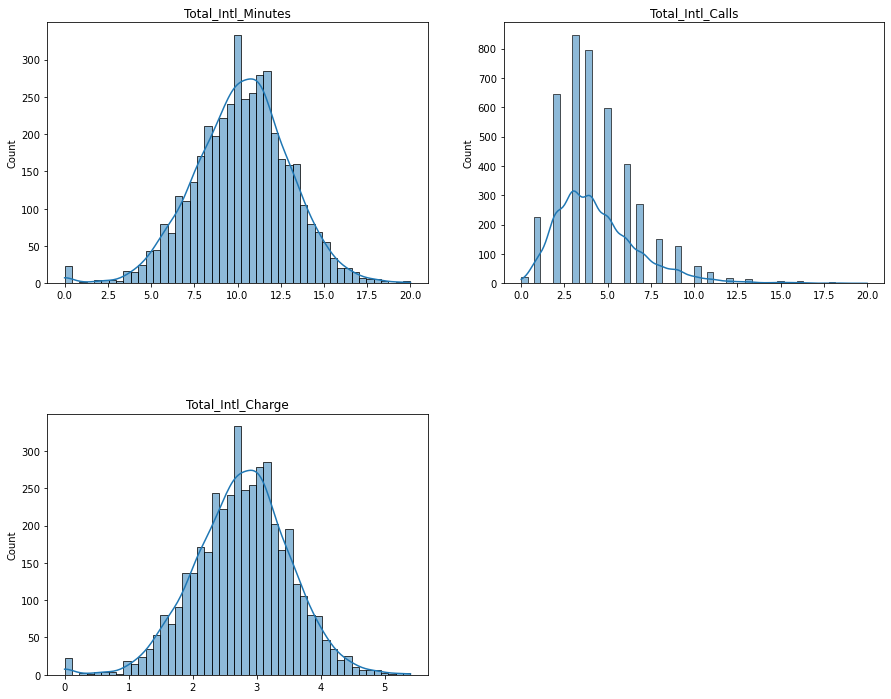

In [29]:
# Visualize the international features distribution
plotting_features_distribution(international_features)

### 4. Data Preprocessing

Data preprocessing is the process of getting our dataset ready for model training. In this section, we will perform the following preprocessing steps:
- Feature Encoding 
- Split the data

Since all our algorithms are a tree based model, we don't really need to scaling our data for the optimization purpose.

Machine learning models require all input and output variables to be numeric. Therefore, we need to encode all of our categorical data before we can fit the models to our data.

In [30]:
# Convert Churn into numerical values where 0 = no and 1 = yes
train['churn'] = train['churn'].replace(['yes','no'], [1,0])

In [31]:
X = pd.get_dummies(data=train, columns= ['state','area_code','international_plan','voice_mail_plan']).drop('churn', axis=1)
y = train['churn']

In [32]:
# split the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42, stratify = y)

In [33]:
# Checking our shape of our training and test data 
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(2975, 73)
(2975,)
(1275, 73)
(1275,)


### 5. Data Modeling

In this project we are going to use four machine learning algorithms:
- Random Forest Classifier
- Gradient Boosting Classifier
- XGboost Classifier


### 5.1 Random Forest Classifier

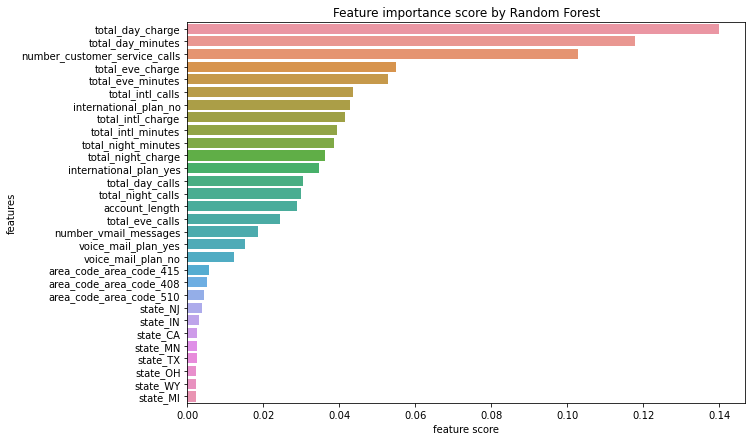

In [34]:
#feature importance scoring by using Random Forest algorithm
forest = RandomForestClassifier(random_state=42, n_jobs=-1)
forest.fit(X_train, y_train)
indices = np.argsort(forest.feature_importances_)[::-1]
features_df = pd.DataFrame({'feature score':pd.Series(forest.feature_importances_),'features':pd.Series(X_train.columns)})   

#plot top 15 important features
plt.figure(figsize=(10,7))
sns.barplot(x='feature score',y='features',data=features_df.sort_values(by='feature score',ascending=False).head(30))
plt.title('Feature importance score by Random Forest')
plt.show()

In [35]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

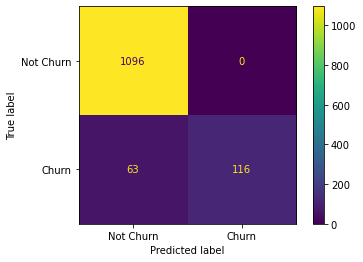

In [36]:
plot_confusion_matrix(rf, X_test, y_test, display_labels=['Not Churn','Churn'])

In the confusion matrix, we see that of the **1096** people that **not churn**, **1096** **(100%)** were correctly classified. And of the **179** people that **churn**, **116** **(64%)** were correctly classified

### 5.1.1 Hyperparameters tuning with GridSearchCV (Random Forest)

In [37]:
param_grid = {
              'n_estimators': [100, 350, 500],
              'min_samples_leaf': [2, 10, 30],
              'max_depth':[5, 10, 20]
             }

In [38]:
rf_grid = GridSearchCV(rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='roc_auc')
rf_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 20],
                         'min_samples_leaf': [2, 10, 30],
                         'n_estimators': [100, 350, 500]},
             scoring='roc_auc')

In [39]:
print(rf_grid.best_params_)
print(rf_grid.best_score_)

{'max_depth': 20, 'min_samples_leaf': 2, 'n_estimators': 500}
0.918408182895827


In [40]:
# Recall score
rf_recall = recall_score(y_test, rf_grid.predict(X_test))

# Accuracy score
rf_accuracy = accuracy_score(y_test,rf_grid.predict(X_test))

rf_auc = roc_auc_score(y_test, rf_grid.predict_proba(X_test)[:,1])

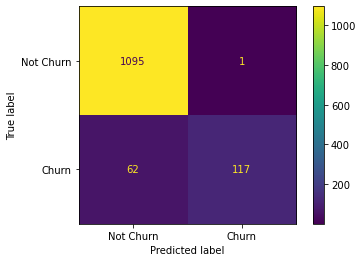

In [41]:
plot_confusion_matrix(rf_grid, X_test, y_test, display_labels=['Not Churn','Churn']) 

Random Forest with model tuning, of the **179** people that churn, **117** **(65%)** were correctly classified

### 5.2 Gradient Boosting Classifier

In [42]:
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

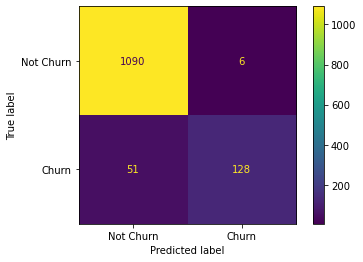

In [43]:
plot_confusion_matrix(gb, X_test, y_test, display_labels=['Not Churn','Churn'])

### 5.2.1 Hyperparameters tuning with GridSearchCV (Gradient Boosting Classifier)

In [44]:
param_grid = {'learning_rate':[0.1],
              'max_depth':[3, 4],
              'n_estimators':[200, 300]
             }

In [45]:
gb_grid = GridSearchCV(gb, 
                       param_grid=param_grid,
                       cv=5,
                       n_jobs=-1, 
                       scoring='roc_auc')
gb_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1], 'max_depth': [3, 4],
                         'n_estimators': [200, 300]},
             scoring='roc_auc')

In [46]:
print(gb_grid.best_params_)
print(gb_grid.best_score_)

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}
0.9114303164222447


In [47]:
# Recall score
gbc_recall = recall_score(y_test, gb_grid.predict(X_test))

# Accuracy score
gbc_acc = accuracy_score(y_test, gb_grid.predict(X_test))

# Auc score
gbc_auc = roc_auc_score(y_test, gb_grid.predict_proba(X_test)[:,1])

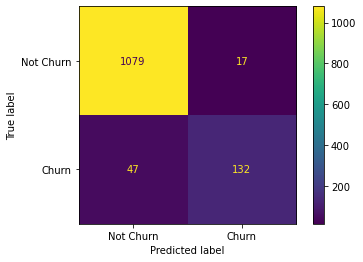

In [48]:
plot_confusion_matrix(gb_grid, X_test, y_test, display_labels=['Not Churn','Churn'])

Our Gradient Boosting model made an improvement with model tuning, of the **179** people that churn, **132** **(73%)** were correctly classified

### 5.3 XGBoost

In [49]:
clf_xgb = XGBClassifier(random_state=42)
clf_xgb.fit(X_train, y_train)

[17:45:16] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

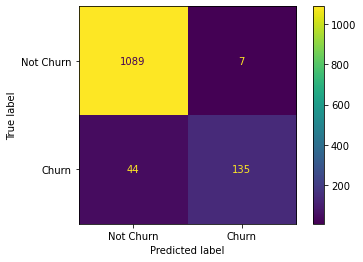

In [50]:
plot_confusion_matrix(clf_xgb, X_test, y_test, display_labels=['Not Churn','Churn'])

In the confusion matrix, we see that of the **1096** people that **not churn**, **1089** **(99%)** were correctly classified. And of the **179** people that **churn**, **135** **(75%)** were correctly classified

### 5.3.1 Hyperparameters tuning with GridSearchCV (XGBoost)

In [51]:
# Grid Search To Get Best Hyperparameters
param_grid = {'learning_rate': [0.3],
              'max_depth': [6,7],
              'gamma':[1],
              'reg_lambda':[1, 3],
              'n_estimators':[400,600]
             }

In [52]:
xgb_grid = GridSearchCV(clf_xgb, param_grid=param_grid, cv=4, n_jobs=-1, scoring='roc_auc')
xgb_grid.fit(X_train, y_train)

[17:51:34] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1,
                                     enable_categorical=False, gamma=0,
                                     gpu_id=-1, importance_type=None,
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_jobs=4,
                                     num_parallel_tree=1, predictor='auto',
                                     random_state=42, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, subsample=1,
          

In [53]:
xgb_grid.best_params_

{'gamma': 1,
 'learning_rate': 0.3,
 'max_depth': 7,
 'n_estimators': 400,
 'reg_lambda': 3}

In [54]:
# Recall score
xgb_recall = recall_score(y_test, xgb_grid.predict(X_test))

# Accuracy score
xgb_acc = accuracy_score(y_test, xgb_grid.predict(X_test))

# Auc score
xgb_auc = roc_auc_score(y_test, xgb_grid.predict_proba(X_test)[:,1])

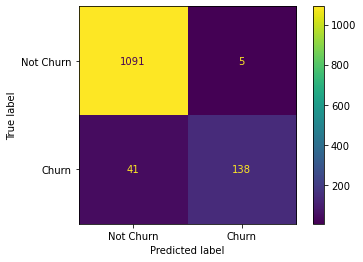

In [55]:
plot_confusion_matrix(xgb_grid, X_test, y_test, display_labels=['Not Churn','Churn']) 

We did an improvement for XGBoost with model tuning, of the **179** people that churn, **138** **(77%)** were correctly classified

### 6. Finding the best model

### 6.1 ROC curve

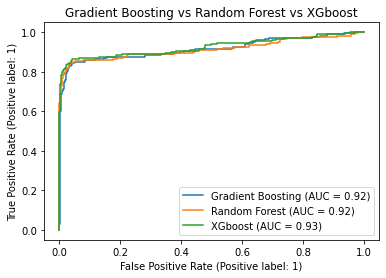

In [56]:
# Logistic regression 
fig = plot_roc_curve(gb_grid, X_test, y_test, name='Gradient Boosting')
# Random Forest
plot_roc_curve(rf_grid, X_test, y_test ,ax=fig.ax_, name='Random Forest')
# XGboost
plot_roc_curve(xgb_grid, X_test, y_test ,ax=fig.ax_, name='XGboost')

plt.title('Gradient Boosting vs Random Forest vs XGboost')
plt.legend(loc='best')
plt.show()

### 6.2 Recall, Accuracy, Precision, Auc

In [57]:
result = pd.DataFrame({'Model':['Random Forest Classifier','Gradient Boosting Classifier','XGboost'],
'Accuracy score':[rf_accuracy, gbc_acc ,xgb_acc],
'Recall score': [rf_recall, gbc_recall ,xgb_recall],
'Auc score':[rf_auc, gbc_auc, xgb_auc]})

result.sort_values(by=['Auc score','Recall score'], ascending=False)
                      

,Model,Accuracy score,Recall score,Auc score
2,XGboost,0.963922,0.770950,0.925723
1,Gradient Boosting Classifier,0.949804,0.737430,0.916971
0,Random Forest Classifier,0.950588,0.653631,0.915120


### 7. Feature Engineering 

Feature engineering is arguably the most important art in machine learning. It is the process of creating new features from existing features to better represent the underlying problem to the predictive models resulting in improved model accuracy on unseen data

We will add 3 new features:
- total calls
- total charges
- total minutes

After adding new features let's see if we can improve the model!

Training data

In [58]:
# Creating feature for total calls
train['total_calls'] = train['total_day_calls']+train['total_eve_calls']+train['total_night_calls']+train['total_intl_calls']

# Creating feature for total charges
train['total_charges'] = train['total_day_charge']+train['total_eve_charge']+train['total_night_charge']+train['total_intl_charge']

# Creating feature for total minutes
train['total_minutes'] = train['total_day_minutes']+train['total_eve_minutes']+train['total_night_minutes']+train['total_intl_minutes']

In [59]:
# New columns of test data: total_calls, total_charges, total_minutes
train.columns

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn', 'total_calls',
       'total_charges', 'total_minutes'],
      dtype='object')

In [60]:
# One hot encoding without transforming numerical features
train_encoded = pd.get_dummies(data=train, columns=['state','area_code','international_plan','voice_mail_plan'])

# Creating X variable
X = train_encoded.drop('churn', axis=1)

# Splitting the training and validation data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state = 42, stratify=y)


### 7.1 Fit the training data


In [61]:
xgb_grid.best_params_

{'gamma': 1,
 'learning_rate': 0.3,
 'max_depth': 7,
 'n_estimators': 400,
 'reg_lambda': 3}

Recall score: 0.8547486033519553
Auc score:  0.932909921298373


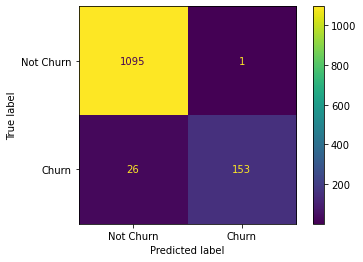

In [62]:
# Fit the training data with our best model
xgb = XGBClassifier(gamma=1,
             learning_rate=0.3,
             max_depth=7,
             n_estimators=400,
             reg_lambda=3)

xgb.fit(X_train, y_train, eval_metric='error')

# Recall score
xgb_recall = recall_score(y_test, xgb.predict(X_test))
print('Recall score:' , xgb_recall)

# Auc score
xgb_auc = roc_auc_score(y_test, xgb.predict_proba(X_test)[:,1])
print('Auc score: ', xgb_auc)
# Confusion matrix
plot_confusion_matrix(xgb, X_test, y_test, display_labels=['Not Churn','Churn'])
plt.show()

In [63]:
print('Accuracy score: ',accuracy_score(y_test, xgb.predict(X_test)))
print('Recall score: ', recall_score(y_test, xgb.predict(X_test)))
print('Auc score: ', roc_auc_score(y_test, xgb.predict_proba(X_test)[:,1]))

Accuracy score:  0.9788235294117648
Recall score:  0.8547486033519553
Auc score:  0.932909921298373


On the training data we made an improvement after we did a feature engineering. And of the **179** people that churn, **153 (85%)** were correctly classified

### 7.2 Testing the model 

In this project we have unlabeled data, we will use this data to testing our best model. And we have to preprocess the test data in similar fashion with the training data

In [64]:
# Test data
test = pd.read_csv('test.csv')
test.head()

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,3,IA,62,area_code_415,no,no,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,4,VT,93,area_code_510,no,no,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,5,NE,174,area_code_415,no,no,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3


In [65]:
# Creating feature for total calls
test['total_calls'] = test['total_day_calls']+test['total_eve_calls']+test['total_night_calls']+test['total_intl_calls']

# Creating feature for total charges
test['total_charges'] = test['total_day_charge']+test['total_eve_charge']+test['total_night_charge']+test['total_intl_charge']

# Creating feature for total minutes
test['total_minutes'] = test['total_day_minutes']+test['total_eve_minutes']+test['total_night_minutes']+test['total_intl_minutes']

In [66]:
# New columns of test data: total_calls, total_charges, total_minutes
test.columns

Index(['id', 'state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'total_calls', 'total_charges',
       'total_minutes'],
      dtype='object')

In [67]:
# One hot encoding without transforming numerical features
test_encoded = pd.get_dummies(data=test, columns=['state','area_code','international_plan','voice_mail_plan'])

# Creating X variable and drop id column
X_new_test = test_encoded.drop('id', axis=1)


In [68]:
predict = xgb.predict(X_new_test)
test['churn'] = predict 

df_out = test[['id','churn']]
print(df_out['churn'].value_counts())

df_out.head()

0    656
1     94
Name: churn, dtype: int64


,id,churn
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
